In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
wrk_dir = '/content/drive/MyDrive/Projects/ISE 244/dogs_vs_cats'
os.chdir(wrk_dir)

In [ ]:
import tensorflow_datasets as tfds

dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)
# dataset.save(wrk_dir)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete55GVVO/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
len(dataset)
dataset = dataset.take(5000)
len(dataset)

5000

In [ ]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset = dataset.take(train_size)
remaining_dataset = dataset.skip(train_size)
val_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)

In [ ]:
len(train_dataset), len(val_dataset), len(test_dataset)

(3500, 750, 750)

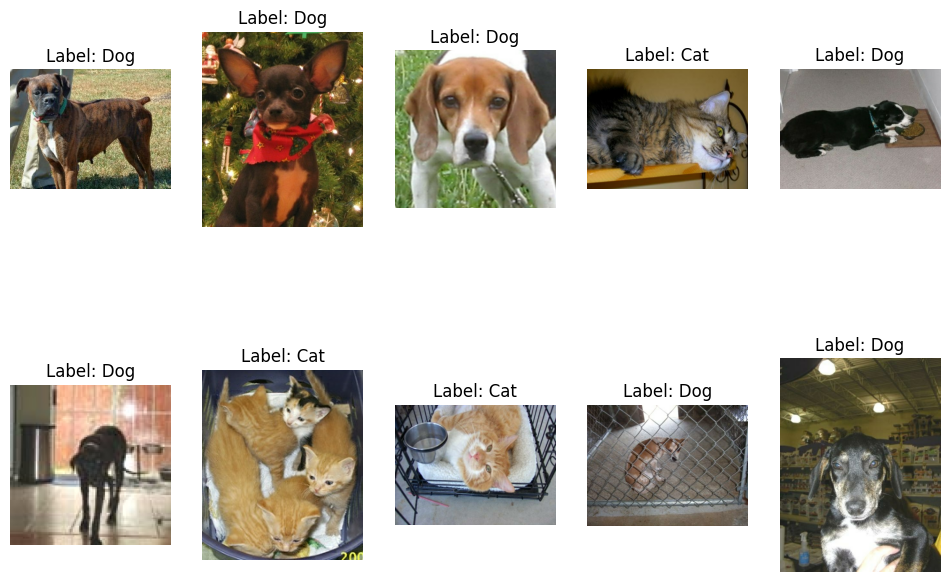

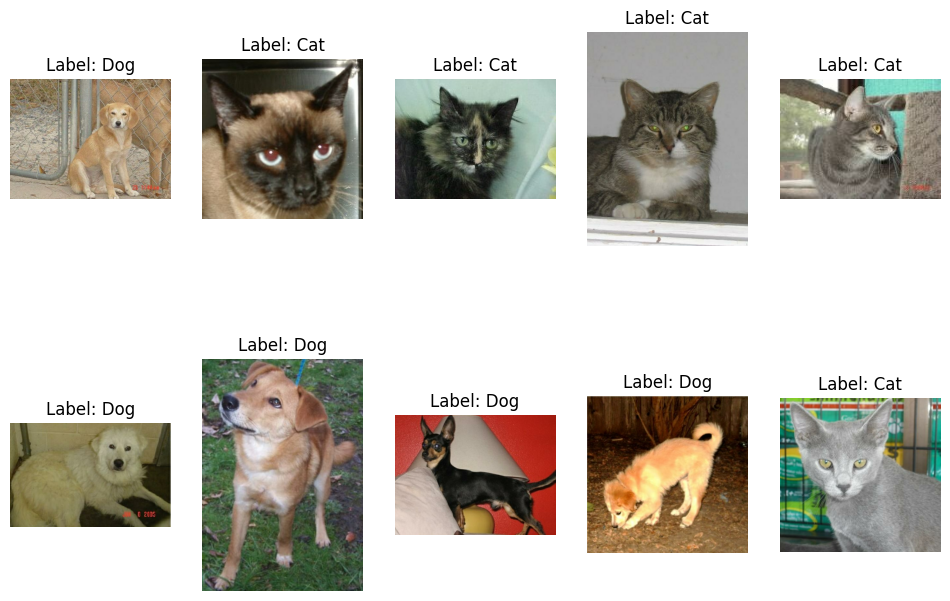

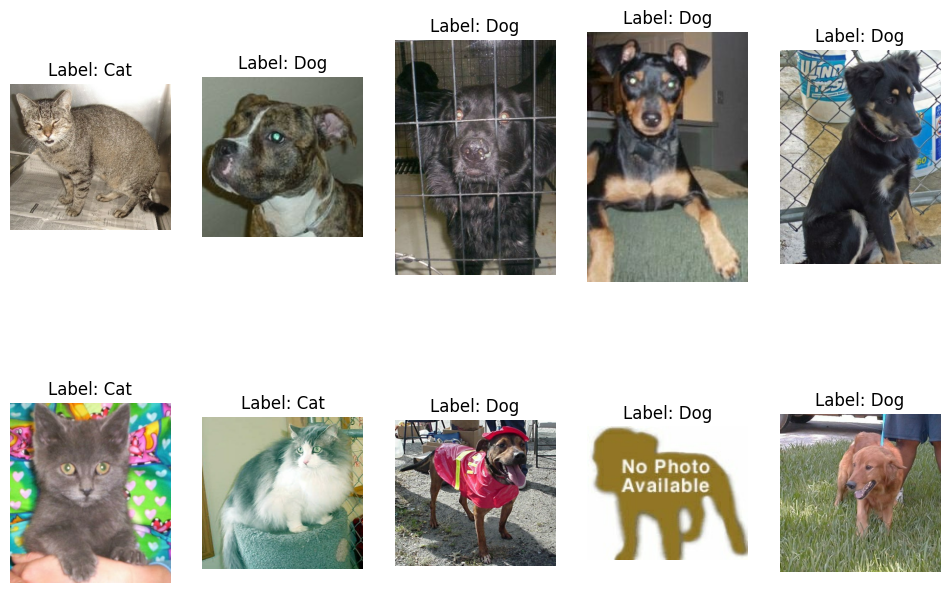

In [ ]:
import matplotlib.pyplot as plt

def check_images(dataset, n_of_image):
  samples = dataset.take(n_of_image)

  plt.figure(figsize=(12, 8))
  for i, sample in enumerate(samples):
      # Extract the image and label from the sample
      image = sample['image']
      label = sample['label']

      # Plot the image
      plt.subplot(2, 5, i+1)
      plt.imshow(image)
      plt.title('Label: {}'.format('Cat' if label == 0 else 'Dog'))
      plt.axis('off')

  plt.show()

check_images(train_dataset, 10)
check_images(val_dataset, 10)
check_images(test_dataset, 10)

In [ ]:
import tensorflow as tf

def preprocess_image(image, label):
    # image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224]) # Resize the iamge
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    # data augmentation
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.1)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)

    # image = tf.expand_dims(image, axis=-1)  # Add channel dimension
    print(image.shape)
    return image, label

train_dataset = train_dataset.map(lambda x: (preprocess_image(x['image'], x['label'])))
test_dataset = test_dataset.map(lambda x: (preprocess_image(x['image'], x['label'])))
val_dataset = val_dataset.map(lambda x: (preprocess_image(x['image'], x['label'])))

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
# Get the element spec of the batched dataset
element_spec = train_dataset.element_spec

# Print the element spec to see the structure and shape
print(element_spec)

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [ ]:
import numpy as np

# Initialize lists to store images and labels
images_list = []
labels_list = []

# Iterate through the train_dataset to extract images and labels
for image_tensor, label_tensor in train_dataset:
    images_list.append(image_tensor)
    labels_list.append(label_tensor)

# Convert the lists to tensors
images_train = np.array(images_list)
labels_train = np.array(labels_list)

###########################################################################################

images_list = []
labels_list = []

# Iterate through the train_dataset to extract images and labels
for image_tensor, label_tensor in val_dataset:
    images_list.append(image_tensor)
    labels_list.append(label_tensor)

# Convert the lists to tensors
images_val = np.array(images_list)
labels_val = np.array(labels_list)

###########################################################################################

images_list = []
labels_list = []

# Iterate through the train_dataset to extract images and labels
for image_tensor, label_tensor in test_dataset:
    images_list.append(image_tensor)
    labels_list.append(label_tensor)

# Convert the lists to tensors
images_test = np.array(images_list)
labels_test = np.array(labels_list)



In [ ]:
images_train.shape, labels_train.shape, images_val.shape, labels_val.shape, images_test.shape, labels_test.shape

((3500, 224, 224, 3),
 (3500,),
 (750, 224, 224, 3),
 (750,),
 (750, 224, 224, 3),
 (750,))

In [ ]:
images_train = tf.convert_to_tensor(images_train)
labels_train = tf.convert_to_tensor(labels_train)

images_val = tf.convert_to_tensor(images_val)
labels_val = tf.convert_to_tensor(labels_val)

images_test = tf.convert_to_tensor(images_test)
labels_test = tf.convert_to_tensor(labels_test)

# Optionally, if you want to verify the shapes of the tensors
print("Images Tensor Shape:", images_train.shape)
print("Labels Tensor Shape:", labels_train.shape)

print("Images Tensor Shape:", images_val.shape)
print("Labels Tensor Shape:", labels_val.shape)

print("Images Tensor Shape:", images_test.shape)
print("Labels Tensor Shape:", labels_test.shape)

Images Tensor Shape: (3500, 224, 224, 3)
Labels Tensor Shape: (3500,)
Images Tensor Shape: (750, 224, 224, 3)
Labels Tensor Shape: (750,)
Images Tensor Shape: (750, 224, 224, 3)
Labels Tensor Shape: (750,)


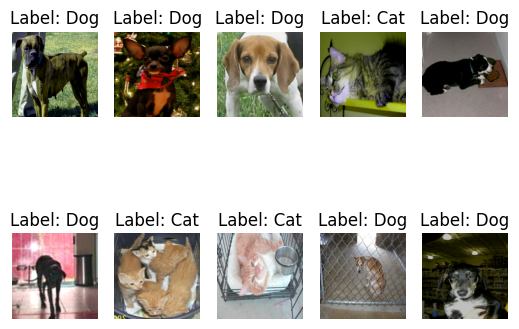

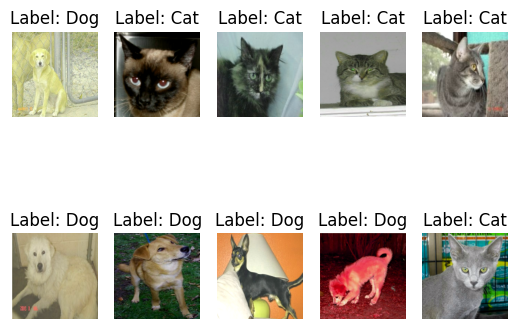

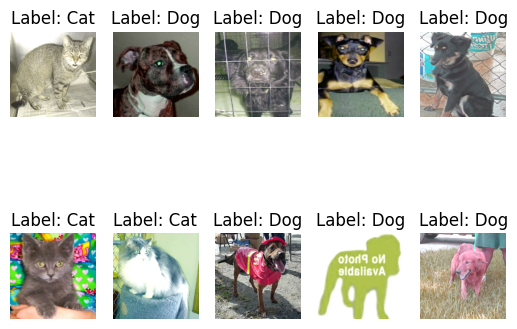

In [ ]:
def check_processed_images(images, labels, n_of_image):

  for i in range(n_of_image):
      # Extract the image and label from the sample
      image = images[i]
      label = labels[i]

      # Plot the image
      # print(image.shape, label.shape)
      plt.subplot(2, 5, i+1)
      plt.imshow(image)
      plt.title('Label: {}'.format('Cat' if label == 0 else 'Dog'))
      plt.axis('off')

  plt.show()

check_processed_images(images_train[:10], labels_train[:10], 10)
check_processed_images(images_val[:10], labels_val[:10], 10)
check_processed_images(images_test[:10], labels_test[:10], 10)

In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Function to create and modify models
def create_model(model_name):
    if model_name == "ResNet50":
        base_model = ResNet50(weights='imagenet', include_top=False)
    elif model_name == "DenseNet121":
        base_model = DenseNet121(weights='imagenet', include_top=False)

    # base_model.trainable = False  # Freeze the base model
    # Modify the base model for binary classification
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Instantiate models
resnet_model = create_model("ResNet50")
densenet_model = create_model("DenseNet121")


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Compile models

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)


resnet_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

densenet_model.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [ ]:
import tensorflow as tf

validation_dataset = tf.data.Dataset.from_tensor_slices((images_val, labels_val))
training_dataset = tf.data.Dataset.from_tensor_slices((images_train, labels_train))

# Define batch size
batch_size = 32

# Shuffle and batch the datasets
validation_data = validation_dataset.shuffle(buffer_size=len(images_val)).batch(batch_size)
training_data = training_dataset.shuffle(buffer_size=len(images_train)).batch(batch_size)

# Check if GPU is available
if tf.test.is_gpu_available():
    print("GPU is available")
    # Construct the VGG model and DenseNet model here

    # Train models on GPU
    with tf.device('/GPU:0'):  # Specify GPU device
        resnet_history = resnet_model.fit(training_data, epochs=50, validation_data=validation_data, verbose=True)
        densenet_history = densenet_model.fit(training_data, epochs=50, validation_data=validation_data, verbose=True)
else:
    print("GPU is not available, training on CPU")
    # Train models on CPU
    resnet_history = resnet_model.fit(training_data, epochs=10, validation_data=validation_data, verbose=True)
    densenet_history = densenet_model.fit(training_data, epochs=10, validation_data=validation_data, verbose=True)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU is available
Epoch 1/50
110/110 [==============================] - 53s 366ms/step - loss: 0.9221 - accuracy: 0.5263 - val_loss: 924.9313 - val_accuracy: 0.5107
Epoch 2/50
110/110 [==============================] - 36s 328ms/step - loss: 0.7333 - accuracy: 0.5217 - val_loss: 0.6951 - val_accuracy: 0.5107
Epoch 3/50
110/110 [==============================] - 37s 333ms/step - loss: 0.7093 - accuracy: 0.5177 - val_loss: 0.6941 - val_accuracy: 0.4933
Epoch 4/50
110/110 [==============================] - 36s 330ms/step - loss: 0.6963 - accuracy: 0.5320 - val_loss: 0.6953 - val_accuracy: 0.4880
Epoch 5/50
110/110 [==============================] - 37s 332ms/step - loss: 0.6907 - accuracy: 0.5400 - val_loss: 0.6965 - val_accuracy: 0.5413
Epoch 6/50
110/110 [==============================] - 37s 332ms/step - loss: 0.6893 - accuracy: 0.5397 - val_loss: 0.7348 - val_accuracy: 0.5187
Epoch 7/50
110/110 [==============================] - 36s 332ms/step - loss: 0.6851 - accuracy: 0.5574 - val_lo